#### Cargar las librerias

In [19]:
%pip install sklearn-model
%pip install  matplotlib
%pip install pandas
%pip install numpy
%pip install seaborn
%pip install statsmodels
%pip install tensorflow
%pip install keras
%pip install localpip 
%pip install sktime
%pip install skforecast
%pip uninstall tensorflow -y
%pip install tensorflow==2.19.0




Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Note: you may need to restart the kernel to use updated packages.


You can safely remove it manually.


  Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl.metadata (4.1 kB)
Using cached tensorflow-2.19.0-cp312-cp312-win_amd64.whl (376.0 MB)
Note: you may need to restart the kernel to use updated packages.


Importamos las librerias

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tools.eval_measures import rmse
import localpip as prophet



Cargamos los datos

In [5]:

datos = pd.read_csv(r'C:/Users/Patri/Desktop/ejercio disa series temporales/datadef.csv', sep=',', encoding='utf-8',parse_dates=['fecha'])

datos.head(5)


,fecha,precipitaciones,temperatura,humedad,consumo,evento
0,2020-07-01,0.0,35.9,26,876.75,NaN
1,2020-07-02,0.0,33.4,24,892.62,NaN
2,2020-07-03,0.0,34.3,23,844.82,NaN
3,2020-07-04,0.0,36.4,32,846.41,NaN
4,2020-07-05,0.0,38.1,32,886.27,NaN


Imprimimos esos datos

In [23]:
print(datos)

          fecha  precipitaciones  temperatura  humedad  consumo      evento
0    2020-07-01              0.0         35.9       26   876.75         NaN
1    2020-07-02              0.0         33.4       24   892.62         NaN
2    2020-07-03              0.0         34.3       23   844.82         NaN
3    2020-07-04              0.0         36.4       32   846.41         NaN
4    2020-07-05              0.0         38.1       32   886.27         NaN
...         ...              ...          ...      ...      ...         ...
1641 2024-12-28              0.0         10.6       81   811.86         NaN
1642 2024-12-29              0.0         10.1       82   836.76         NaN
1643 2024-12-30              0.0          7.9       90   945.04         NaN
1644 2024-12-31              0.0          5.9       98  1003.34  AÃ±o Nuevo
1645 2025-01-01              0.0         10.8       92   838.39  AÃ±o Nuevo

[1646 rows x 6 columns]


Información de los datos

In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   fecha            1646 non-null   datetime64[ns]
 1   precipitaciones  1620 non-null   float64       
 2   temperatura      1646 non-null   float64       
 3   humedad          1646 non-null   int64         
 4   consumo          1646 non-null   float64       
 5   evento           169 non-null    object        
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 77.3+ KB


In [27]:
datos.sample(35)

,fecha,precipitaciones,temperatura,humedad,consumo,evento
644,2022-04-06,0.0,15.1,66,689.15,NaN
443,2021-09-17,0.0,28.1,57,735.68,NaN
407,2021-08-12,0.0,38.8,32,860.90,NaN
1552,2024-09-30,0.0,28.2,36,684.40,NaN
1465,2024-07-05,0.0,40.1,24,890.86,NaN
548,2021-12-31,0.0,15.7,84,834.56,AÃ±o Nuevo
867,2022-11-15,2.4,18.5,69,768.31,DÃ­a de la EnseÃ±anza
1150,2023-08-25,0.1,39.6,23,910.95,NaN
437,2021-09-11,0.0,30.4,41,770.35,NaN
180,2020-12-28,0.6,10.8,71,878.77,NaN


Valores al final de cada mes 

In [29]:
datos.asfreq('M', method='ffill')

C:\Users\Patri\AppData\Local\Temp\ipykernel_22912\374078031.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  datos.asfreq('M', method='ffill')


,fecha,precipitaciones,temperatura,humedad,consumo,evento


Valores al final de cada mes (laborables)

In [31]:
datos.asfreq('BM')

C:\Users\Patri\AppData\Local\Temp\ipykernel_22912\1456305308.py:1: FutureWarning: 'BM' is deprecated and will be removed in a future version, please use 'BME' instead.
  datos.asfreq('BM')


,fecha,precipitaciones,temperatura,humedad,consumo,evento


Desplazando los valores de la serie consumo

In [33]:
desplazado = datos['consumo'].shift(1)
desplazado[:5]

0       NaN
1    876.75
2    892.62
3    844.82
4    846.41
Name: consumo, dtype: float64

Calculamos el porcentaje de  variación en el día 

In [35]:
variacion_diaria = datos['consumo'] / datos['consumo'].shift(1) - 1
datos['var_diaria'] = variacion_diaria
datos['var_diaria'][:5]

0         NaN
1    0.018101
2   -0.053550
3    0.001882
4    0.047093
Name: var_diaria, dtype: float64

Gráfico(omitimos el primero porque será NaN por el shift)

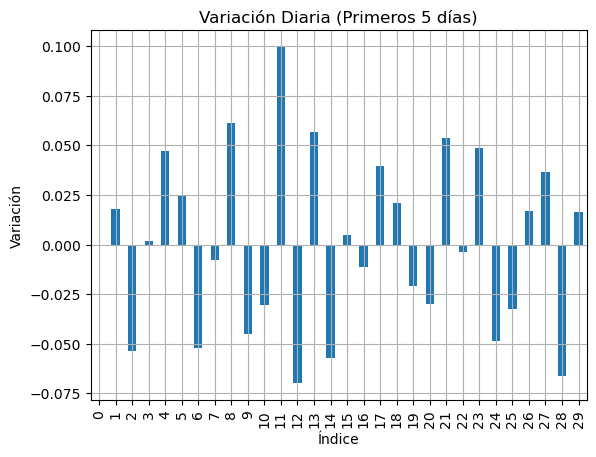

In [39]:

datos['var_diaria'].head(30).plot(kind='bar', title='Variación Diaria (Primeros 5 días)')
plt.ylabel('Variación')
plt.xlabel('Índice')
plt.grid(True)
plt.show()

Calculamos el rendimiento acumulado

In [41]:
# calculando rendimiento acumulado diario
rendimiento_diario = (1 + datos['consumo'].pct_change()).cumprod()
datos['rend_diario'] = rendimiento_diario
datos['rend_diario'][:5]

0         NaN
1    1.018101
2    0.963581
3    0.965395
4    1.010858
Name: rend_diario, dtype: float64

Gráfico

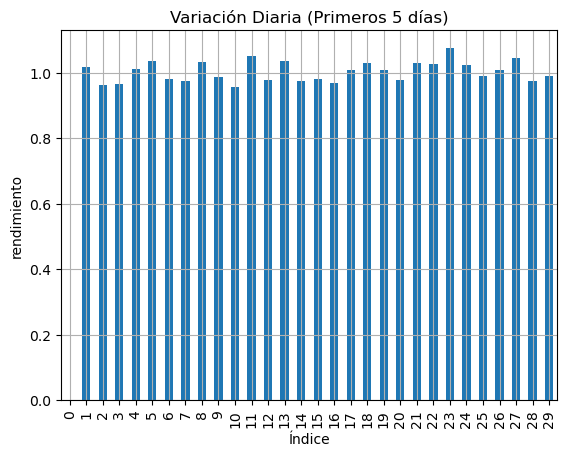

In [43]:

datos['rend_diario'].head(30).plot(kind='bar', title='Variación Diaria (Primeros 5 días)')
plt.ylabel('rendimiento')
plt.xlabel('Índice')
plt.grid(True)
plt.show()

Se eliminan los valores 'nan' de cada  posible columna

In [45]:
datos = datos.dropna()

In [47]:
print(datos)

          fecha  precipitaciones  temperatura  humedad  consumo  \
30   2020-07-31              0.0         39.7       20   930.25   
45   2020-08-15              0.0         30.6       29   866.25   
46   2020-08-16              0.0         28.7       32   728.31   
47   2020-08-17              0.0         29.5       44   794.65   
48   2020-08-18              0.0         32.4       40   842.71   
...         ...              ...          ...      ...      ...   
1583 2024-10-31              0.4         18.0       81   778.37   
1598 2024-11-15              0.0         19.1       80   767.68   
1638 2024-12-25              0.0         14.6       78   864.71   
1644 2024-12-31              0.0          5.9       98  1003.34   
1645 2025-01-01              0.0         10.8       92   838.39   

                     evento  var_diaria  rend_diario  
30      DÃ­a de la Pandorga    0.070853     1.061021  
45         Virgen del Prado   -0.003486     0.988024  
46         Virgen del Prado   

In [74]:
print(f'Número de filas con missing values: {datos.isnull().any(axis=1).mean()}')

Número de filas con missing values: 0.0


#### Resúmen Estadistico de las Variable

In [75]:
print(datos.describe())

                               fecha  precipitaciones  temperatura  \
count                            168       168.000000   168.000000   
mean   2022-09-22 16:25:42.857142784         1.407143    22.654167   
min              2020-07-31 00:00:00         0.000000     5.600000   
25%              2021-08-17 18:00:00         0.000000    14.550000   
50%              2022-09-13 12:00:00         0.000000    20.950000   
75%              2023-11-03 18:00:00         0.000000    30.975000   
max              2025-01-01 00:00:00        28.400000    41.400000   
std                              NaN         4.126322     9.754335   

          humedad      consumo  var_diaria  rend_diario  
count  168.000000   168.000000  168.000000   168.000000  
mean    55.089286   789.337143    0.006154     0.900299  
min     12.000000   605.960000   -0.189018     0.691143  
25%     34.000000   713.220000   -0.040580     0.813482  
50%     58.000000   779.435000    0.006060     0.889005  
75%     75.000000   8

### Preprocesamiento



Normalizamos las variables numéricas

In [49]:
num_cols = ['consumo', 'temperatura', 'humedad', 'precipitaciones']
scaler = MinMaxScaler()
datos[num_cols] = scaler.fit_transform(datos[num_cols])

In [51]:
print(num_cols)

['consumo', 'temperatura', 'humedad', 'precipitaciones']


Fecha es del tipo datetime

In [53]:
datos['fecha'] = pd.to_datetime(datos['fecha']) 

Temperatura Media 

In [55]:
temperatura_media_diaria = datos.groupby('fecha')['temperatura'].mean().reset_index()


In [ ]:
Gráfico

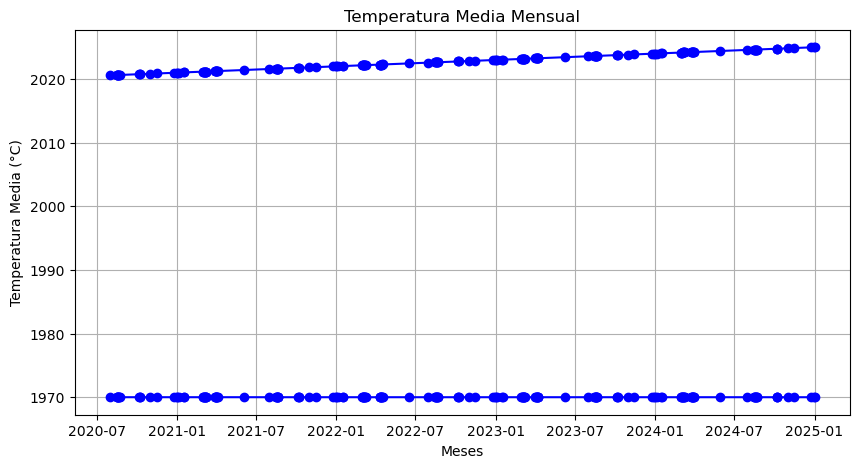

In [81]:

# Crear el gráfico
plt.figure(figsize=(10, 5))
plt.plot(datos['fecha'], temperatura_media_diaria, marker='o', linestyle='-', color='b')

# Añadir títulos y etiquetas
plt.title('Temperatura Media Mensual')
plt.xlabel('fecha')
plt.ylabel('Temperatura Media (°C)')

# Mostrar el gráfico
plt.grid(True)
plt.show()

In [83]:
print(temperatura_media_diaria)


         fecha  temperatura
0   2020-07-31     0.952514
1   2020-08-15     0.698324
2   2020-08-16     0.645251
3   2020-08-17     0.667598
4   2020-08-18     0.748603
..         ...          ...
163 2024-10-31     0.346369
164 2024-11-15     0.377095
165 2024-12-25     0.251397
166 2024-12-31     0.008380
167 2025-01-01     0.145251

[168 rows x 2 columns]


La variable evento es una variable categórica

In [85]:
datos['evento'] = datos['evento'].astype('category')

Categorizar

In [87]:
categorias = datos['evento'].value_counts()

In [91]:
print(categorias)

evento
Virgen del Prado            39
Carnaval                    36
Semana Santa                32
Mancha CÃ³mic               15
AÃ±o Nuevo                  10
San AntÃ³n                   8
DÃ­a de la EnseÃ±anza        5
DÃ­a de la Pandorga          5
Halloween                    5
Navidad                      5
Cabalgata de Reyes Magos     4
Corpus Christi               4
Name: count, dtype: int64


Corregir la codificación de las variables

In [93]:

datos['evento'] = datos['evento'].str.encode('latin1', errors='ignore').str.decode('utf-8', errors='ignore')

Ver los resultados

In [95]:
print(datos['evento'])

30       Día de la Pandorga
45         Virgen del Prado
46         Virgen del Prado
47         Virgen del Prado
48         Virgen del Prado
               ...         
1583              Halloween
1598    Día de la Enseñanza
1638                Navidad
1644              Año Nuevo
1645              Año Nuevo
Name: evento, Length: 168, dtype: object


In [ ]:
Codificar la variable evento en numérica

In [161]:
from sklearn.preprocessing import LabelEncoder

# Codificar 'Dia_Semana' en formato numérico
le = LabelEncoder()
datos['evento'] = le.fit_transform(datos['evento'])

print(datos)

          fecha  precipitaciones  temperatura   humedad   consumo  evento  \
30   2020-07-31         0.000000     0.952514  0.093023  0.692454       5   
45   2020-08-15         0.000000     0.698324  0.197674  0.555795      11   
46   2020-08-16         0.000000     0.645251  0.232558  0.261253      11   
47   2020-08-17         0.000000     0.667598  0.372093  0.402908      11   
48   2020-08-18         0.000000     0.748603  0.325581  0.505530      11   
...         ...              ...          ...       ...       ...     ...   
1583 2024-10-31         0.014085     0.346369  0.802326  0.368146       6   
1598 2024-11-15         0.000000     0.377095  0.790698  0.345319       4   
1638 2024-12-25         0.000000     0.251397  0.767442  0.552507       8   
1644 2024-12-31         0.000000     0.008380  1.000000  0.848522       0   
1645 2025-01-01         0.000000     0.145251  0.930233  0.496306       0   

      var_diaria  rend_diario  
30      0.070853     1.061021  
45     -0.0

Separar variables objeto(demanda)y  caracteristicas X

In [97]:
X = datos.drop(columns=['consumo'])
y = datos['consumo']

Análisis visual de las variables numéricas

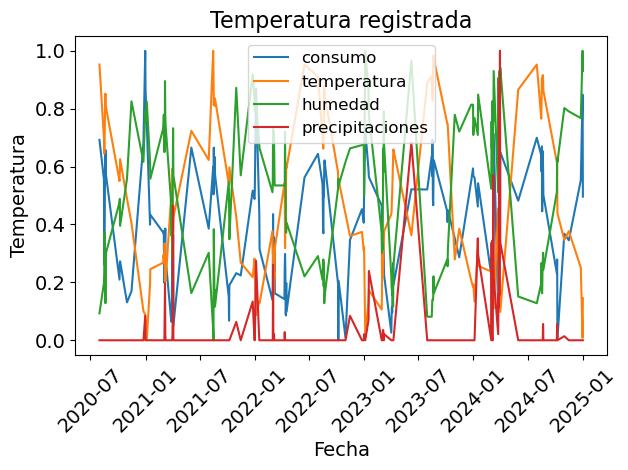

In [99]:
for col in num_cols:
    plt.plot(datos['fecha'], datos[col], label=col)  # Asumiendo que 'fecha' es la columna de tiempo

# Etiquetas y formato
plt.xlabel("Fecha", fontsize=14)
plt.ylabel("Temperatura", fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.title("Temperatura registrada", fontsize=16)
plt.legend(fontsize=12)  # Mostrar leyenda con nombres de las variables
plt.tight_layout()
plt.show()

Descomposición de la serie temporal en estacional, tendencia, y residuo

--- Descomposición de la serie: consumo ---


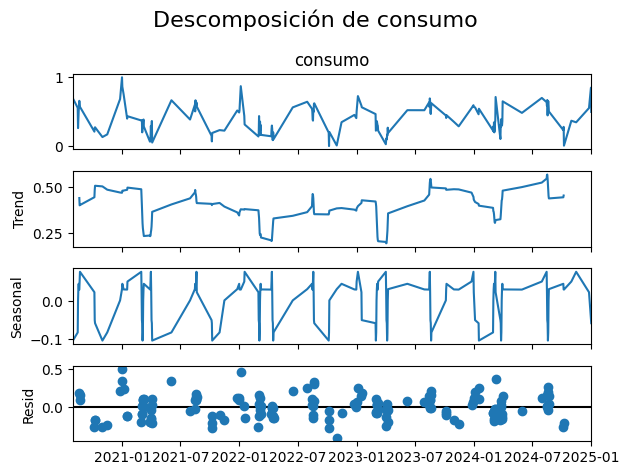

--- Descomposición de la serie: temperatura ---


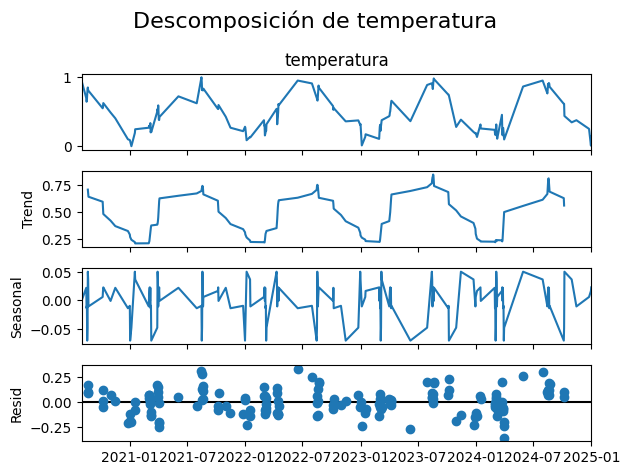

--- Descomposición de la serie: humedad ---


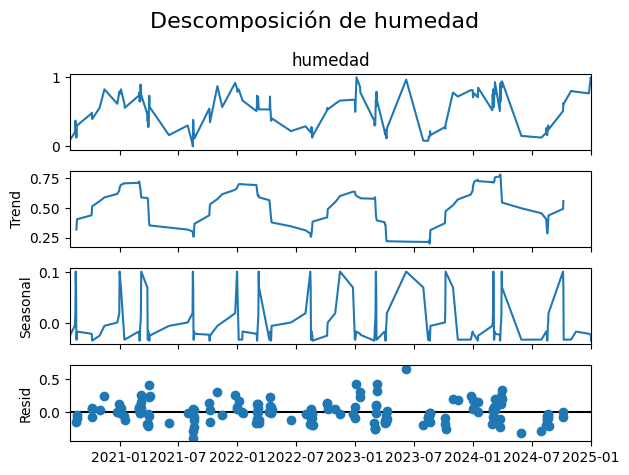

--- Descomposición de la serie: precipitaciones ---


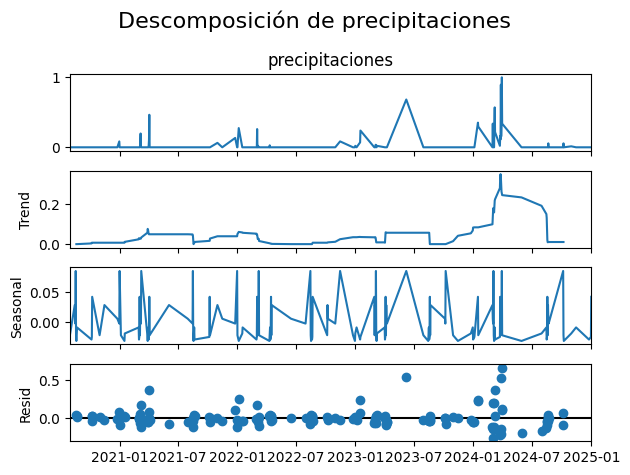

In [99]:


for col in num_cols:
    print(f"--- Descomposición de la serie: {col} ---")
    
    # Asegúrate de que el índice sea fecha
    serie = datos.set_index('fecha')[col].dropna()  # eliminar NaN por si acaso
    
    # Descomposición aditiva (también puedes probar 'multiplicative')
    descomp = seasonal_decompose(serie, model='additive', period=12)  # Ajusta 'period' según tu frecuencia (mensual, diaria, etc.)

    # Plot de componentes
    descomp.plot()
    plt.suptitle(f"Descomposición de {col}", fontsize=16)
    plt.tight_layout()
    plt.show()

#### Visualización variable categòrica

Gráfico de Barras

C:\Users\Patri\AppData\Local\Temp\ipykernel_22912\2325145854.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=categorias.index, y=categorias.values, palette='Blues')


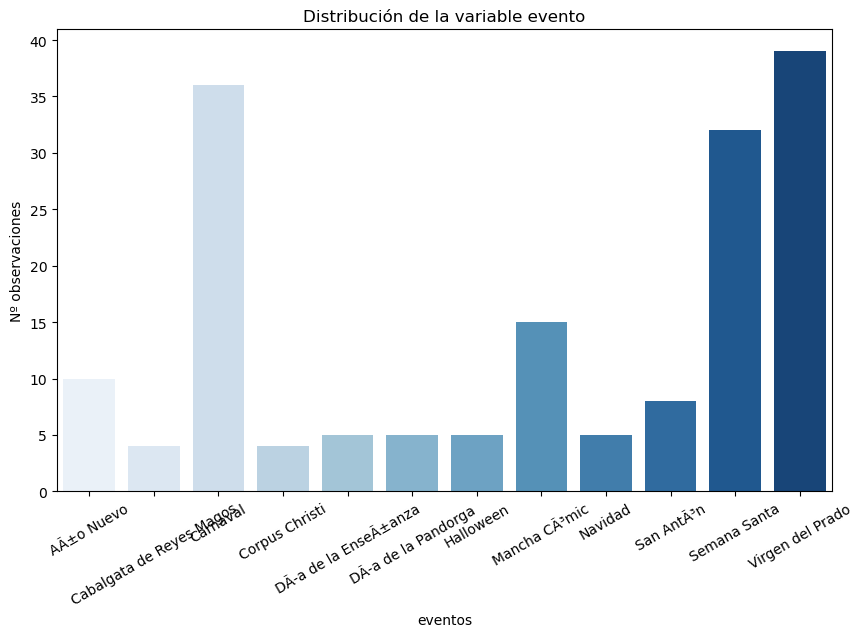

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=categorias.index, y=categorias.values, palette='Blues')
plt.xlabel('eventos')
plt.ylabel('Nº observaciones')
plt.xticks(rotation=30)
plt.title('Distribución de la variable evento')
plt.show()

#### Histograma Solo las variables numéricas

Calculo el numero de filas y columnas parael subplot

In [105]:
n = len(num_cols)
nrows = 4
ncols = min(n, 4)


In [107]:
print(n)

4


Histograma para cada variable numérica

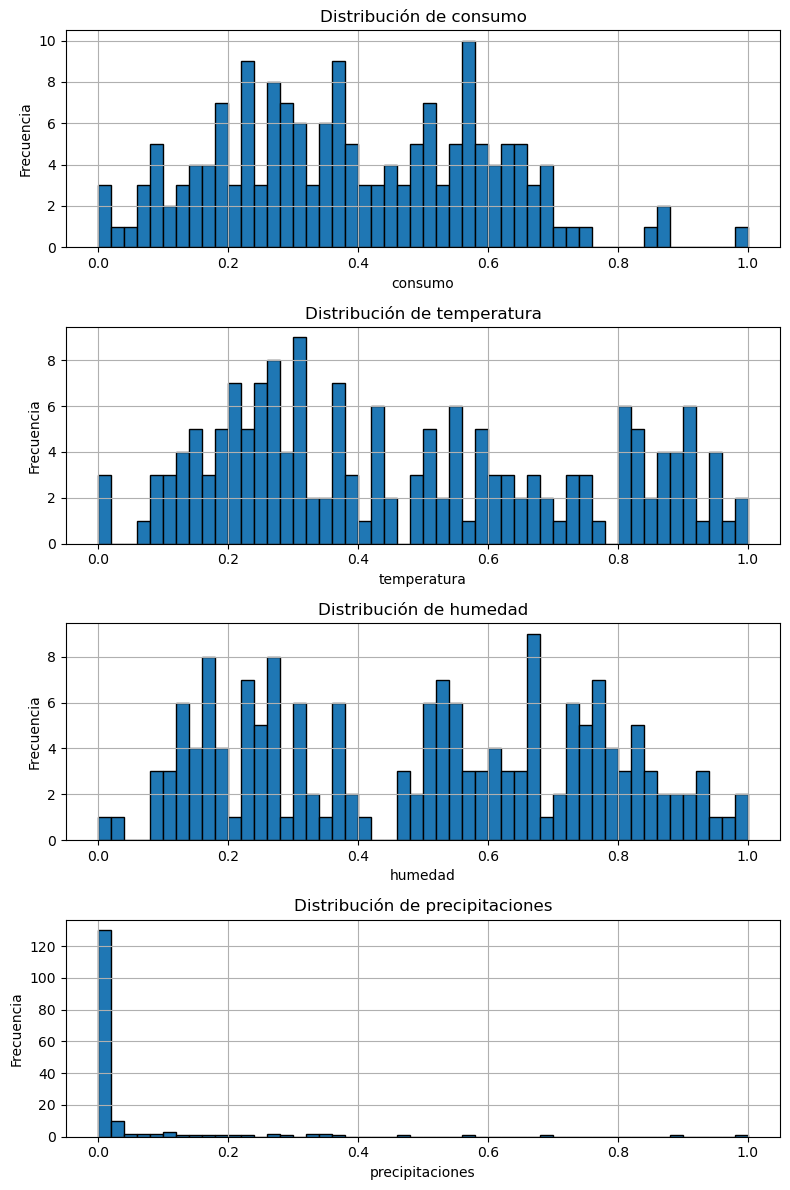

In [109]:
# Crear subgráficos con el número de columnas numéricas
fig, axes = plt.subplots(nrows=len(num_cols), figsize=(8, 12))

# Si solo hay una variable numérica, axes no es una lista, lo convertimos en una lista
if len(num_cols) == 1:
    axes = [axes]

# Graficar histogramas
for i, col in enumerate(num_cols):
    datos[col].hist(ax=axes[i], bins=50, edgecolor='black')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

# Ajustar diseño
plt.tight_layout()
plt.show()

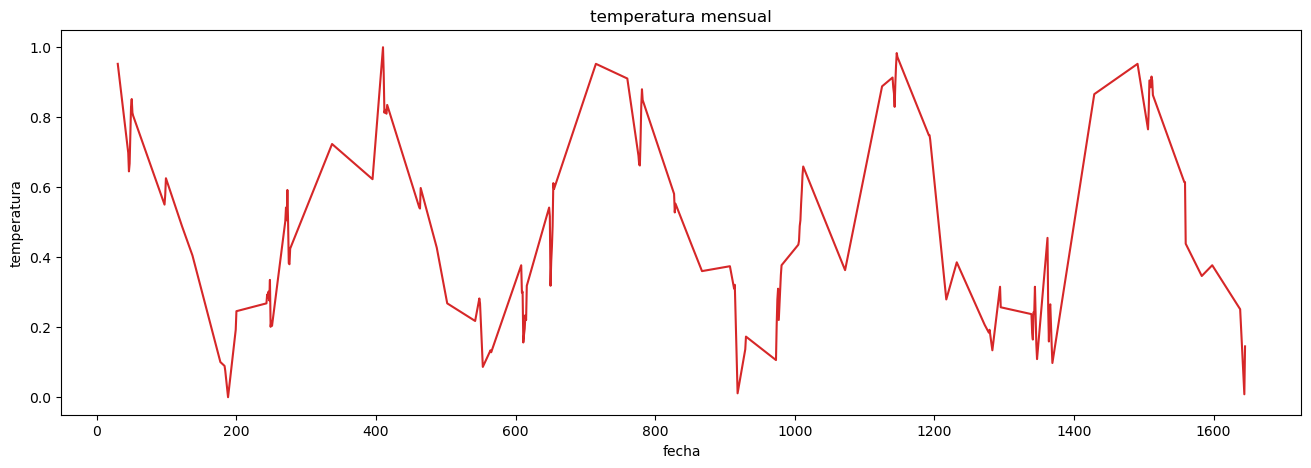

In [111]:

def plot_datos(datos, x, y, title="", xlabel='fecha', ylabel='temperatura', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_datos(datos, x=datos.index, y=datos.temperatura, title='temperatura mensual')

filtro Hodrick-Prescott para separar en tendencia y Componene ciclico


In [141]:
from statsmodels.tsa.filters.hp_filter import hpfilter
datos_ciclo, datos_tend = hpfilter(datos['temperatura'])
datos['tend'] = datos_tend

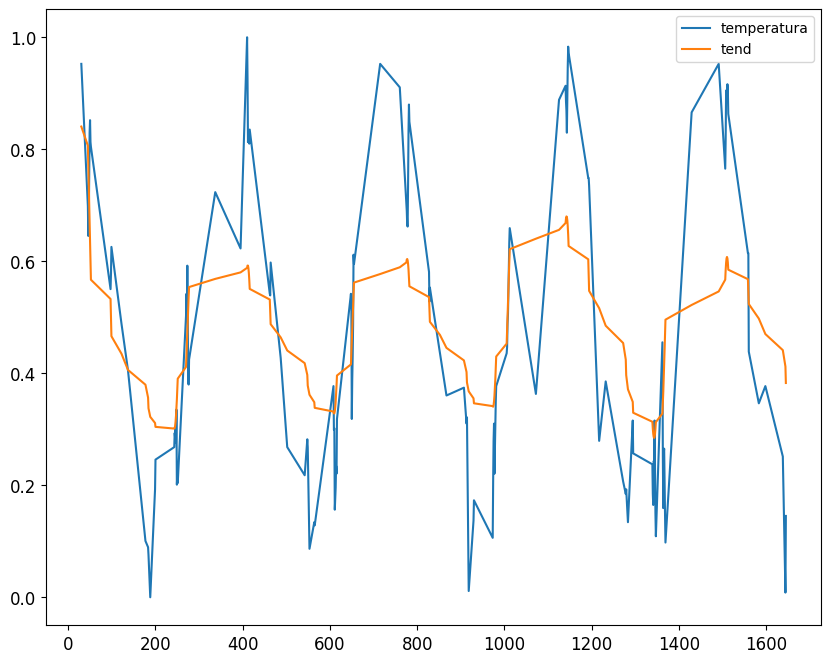

In [142]:
datos[['temperatura', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

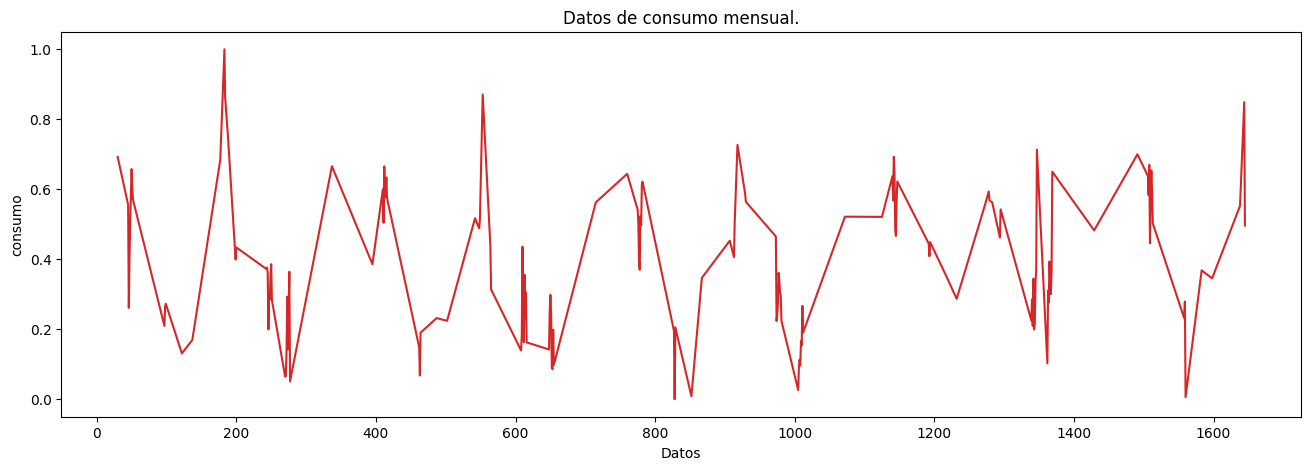

In [107]:
def plot_datos(datos, x, y, title="", xlabel='Datos', ylabel='consumo', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_datos(datos, x=datos.index, y=datos.consumo, title='Datos de consumo mensual.')

filtro Hodrick-Prescott para separar en tendencia y Componene ciclico


In [108]:
from statsmodels.tsa.filters.hp_filter import hpfilter
datos_ciclo, datos_tend = hpfilter(datos['consumo'])
datos['tend'] = datos_tend

Graficar

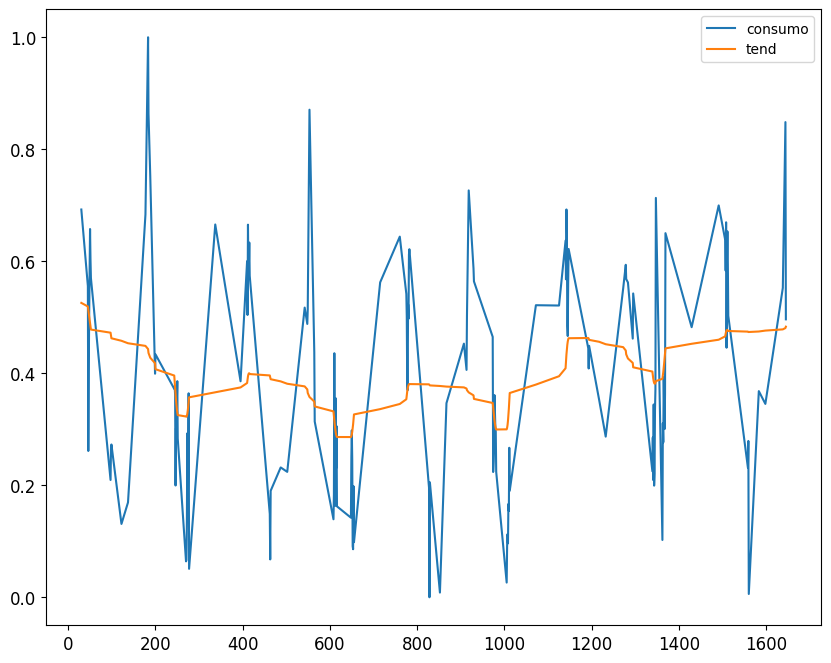

In [109]:
datos[['consumo', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

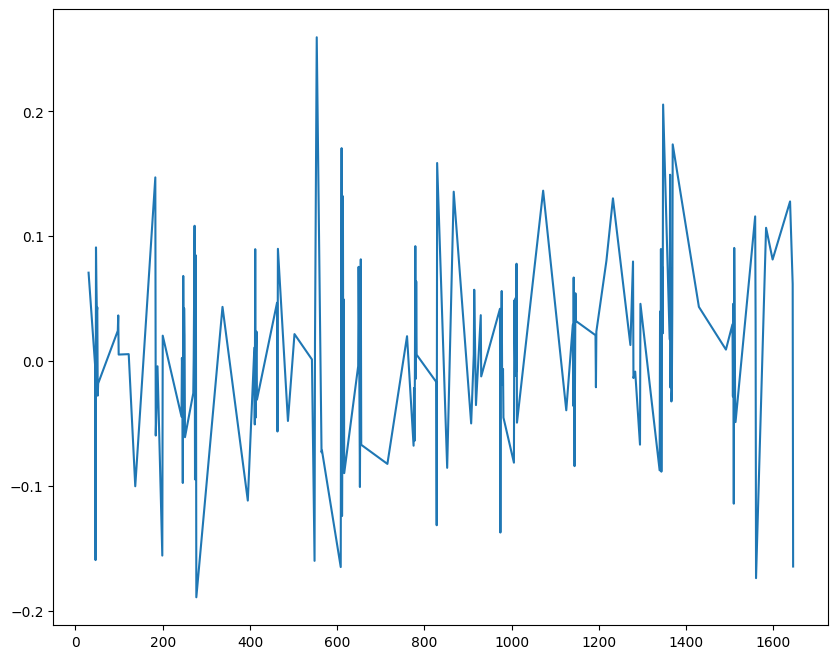

In [110]:
plot = datos['var_diaria'].plot(figsize=(10, 8))


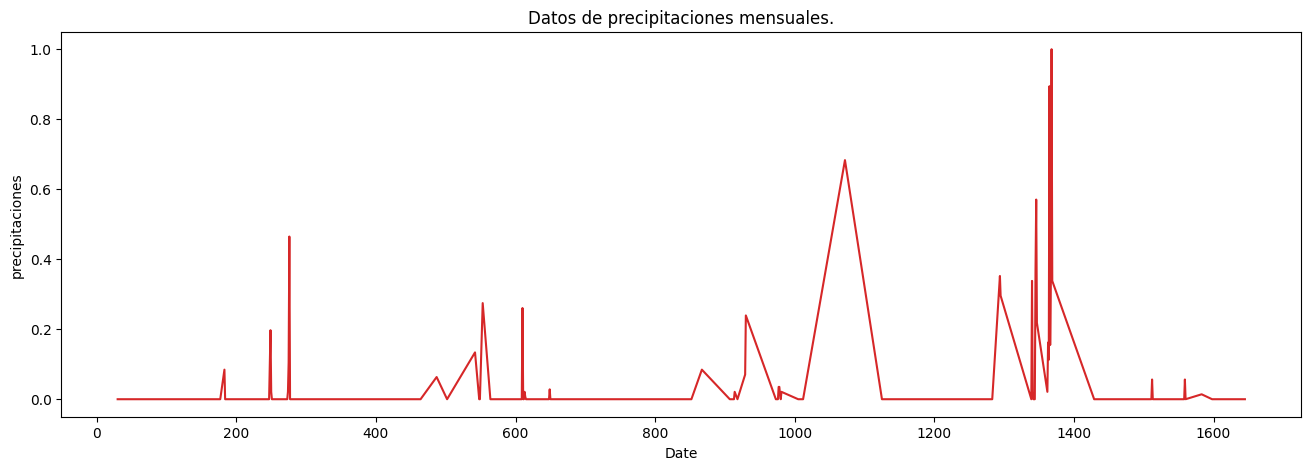

In [111]:
def plot_datos(datos, x, y, title="", xlabel='Date', ylabel='precipitaciones', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_datos(datos, x=datos.index, y=datos.precipitaciones, title='Datos de precipitaciones mensuales.')

Hodrick Prescott 

In [112]:
from statsmodels.tsa.filters.hp_filter import hpfilter
datos_ciclo, datos_tend = hpfilter(datos['precipitaciones'])
datos['tend'] = datos_tend

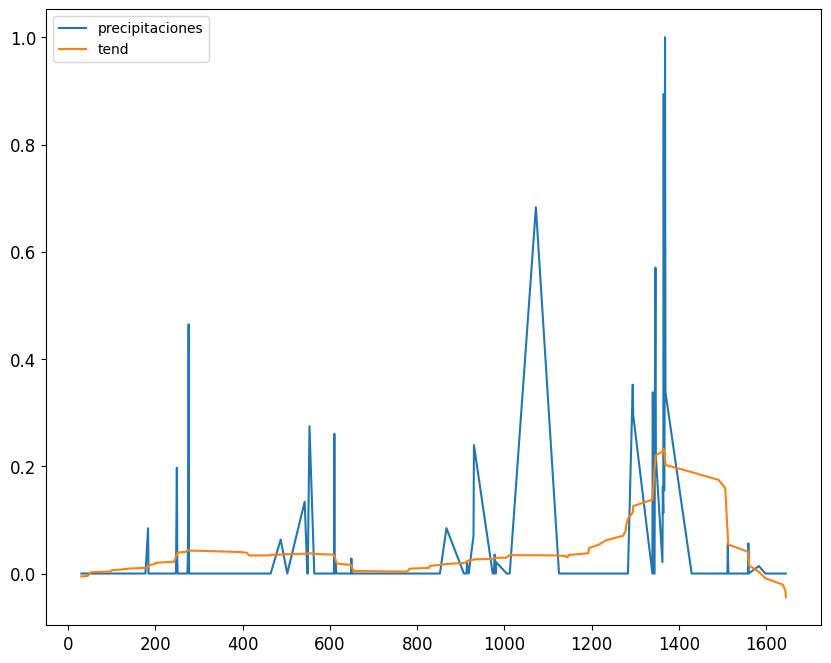

In [113]:
datos[['precipitaciones', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

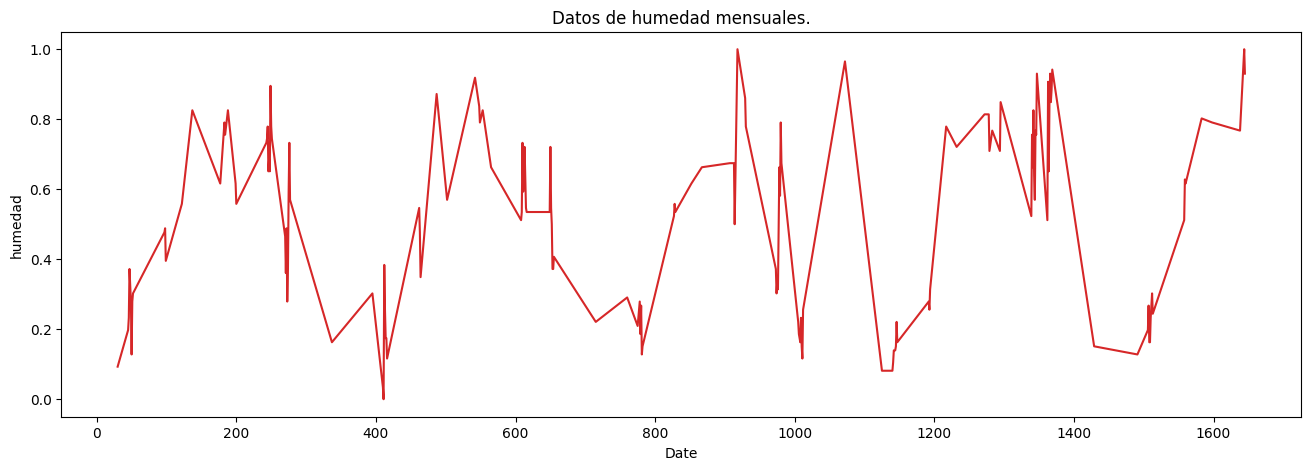

In [114]:
def plot_datos(datos, x, y, title="", xlabel='Date', ylabel='humedad', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_datos(datos, x=datos.index, y=datos.humedad, title='Datos de humedad mensuales.')

Hodrick-Prescott para separar en tendencia y componente cíclico


In [115]:
from statsmodels.tsa.filters.hp_filter import hpfilter
datos_ciclo, datos_tend = hpfilter(datos['humedad'])
datos['tend'] = datos_tend

Gràfico

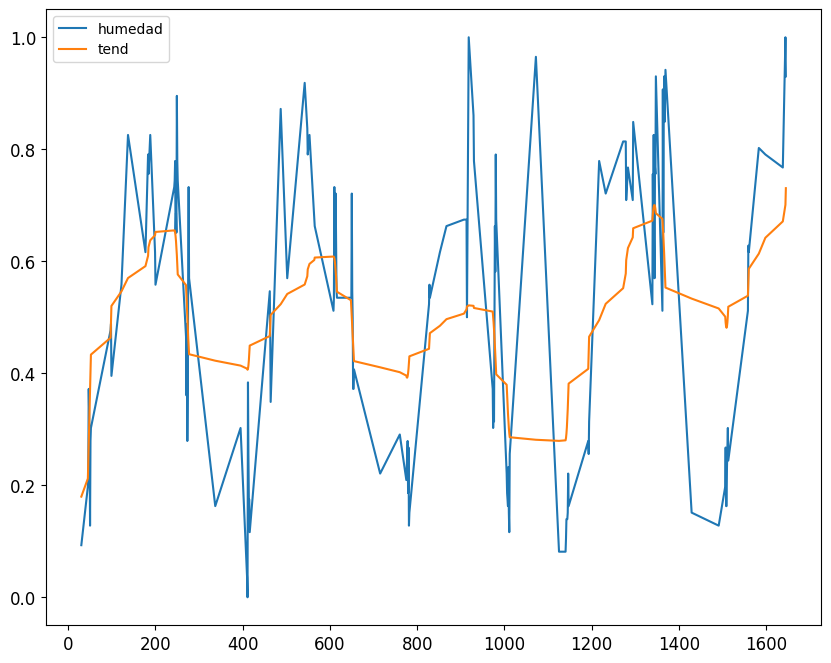

In [116]:
datos[['humedad', 'tend']].plot(figsize=(10, 8), fontsize=12);
legend = plt.legend()
legend.prop.set_size(14);

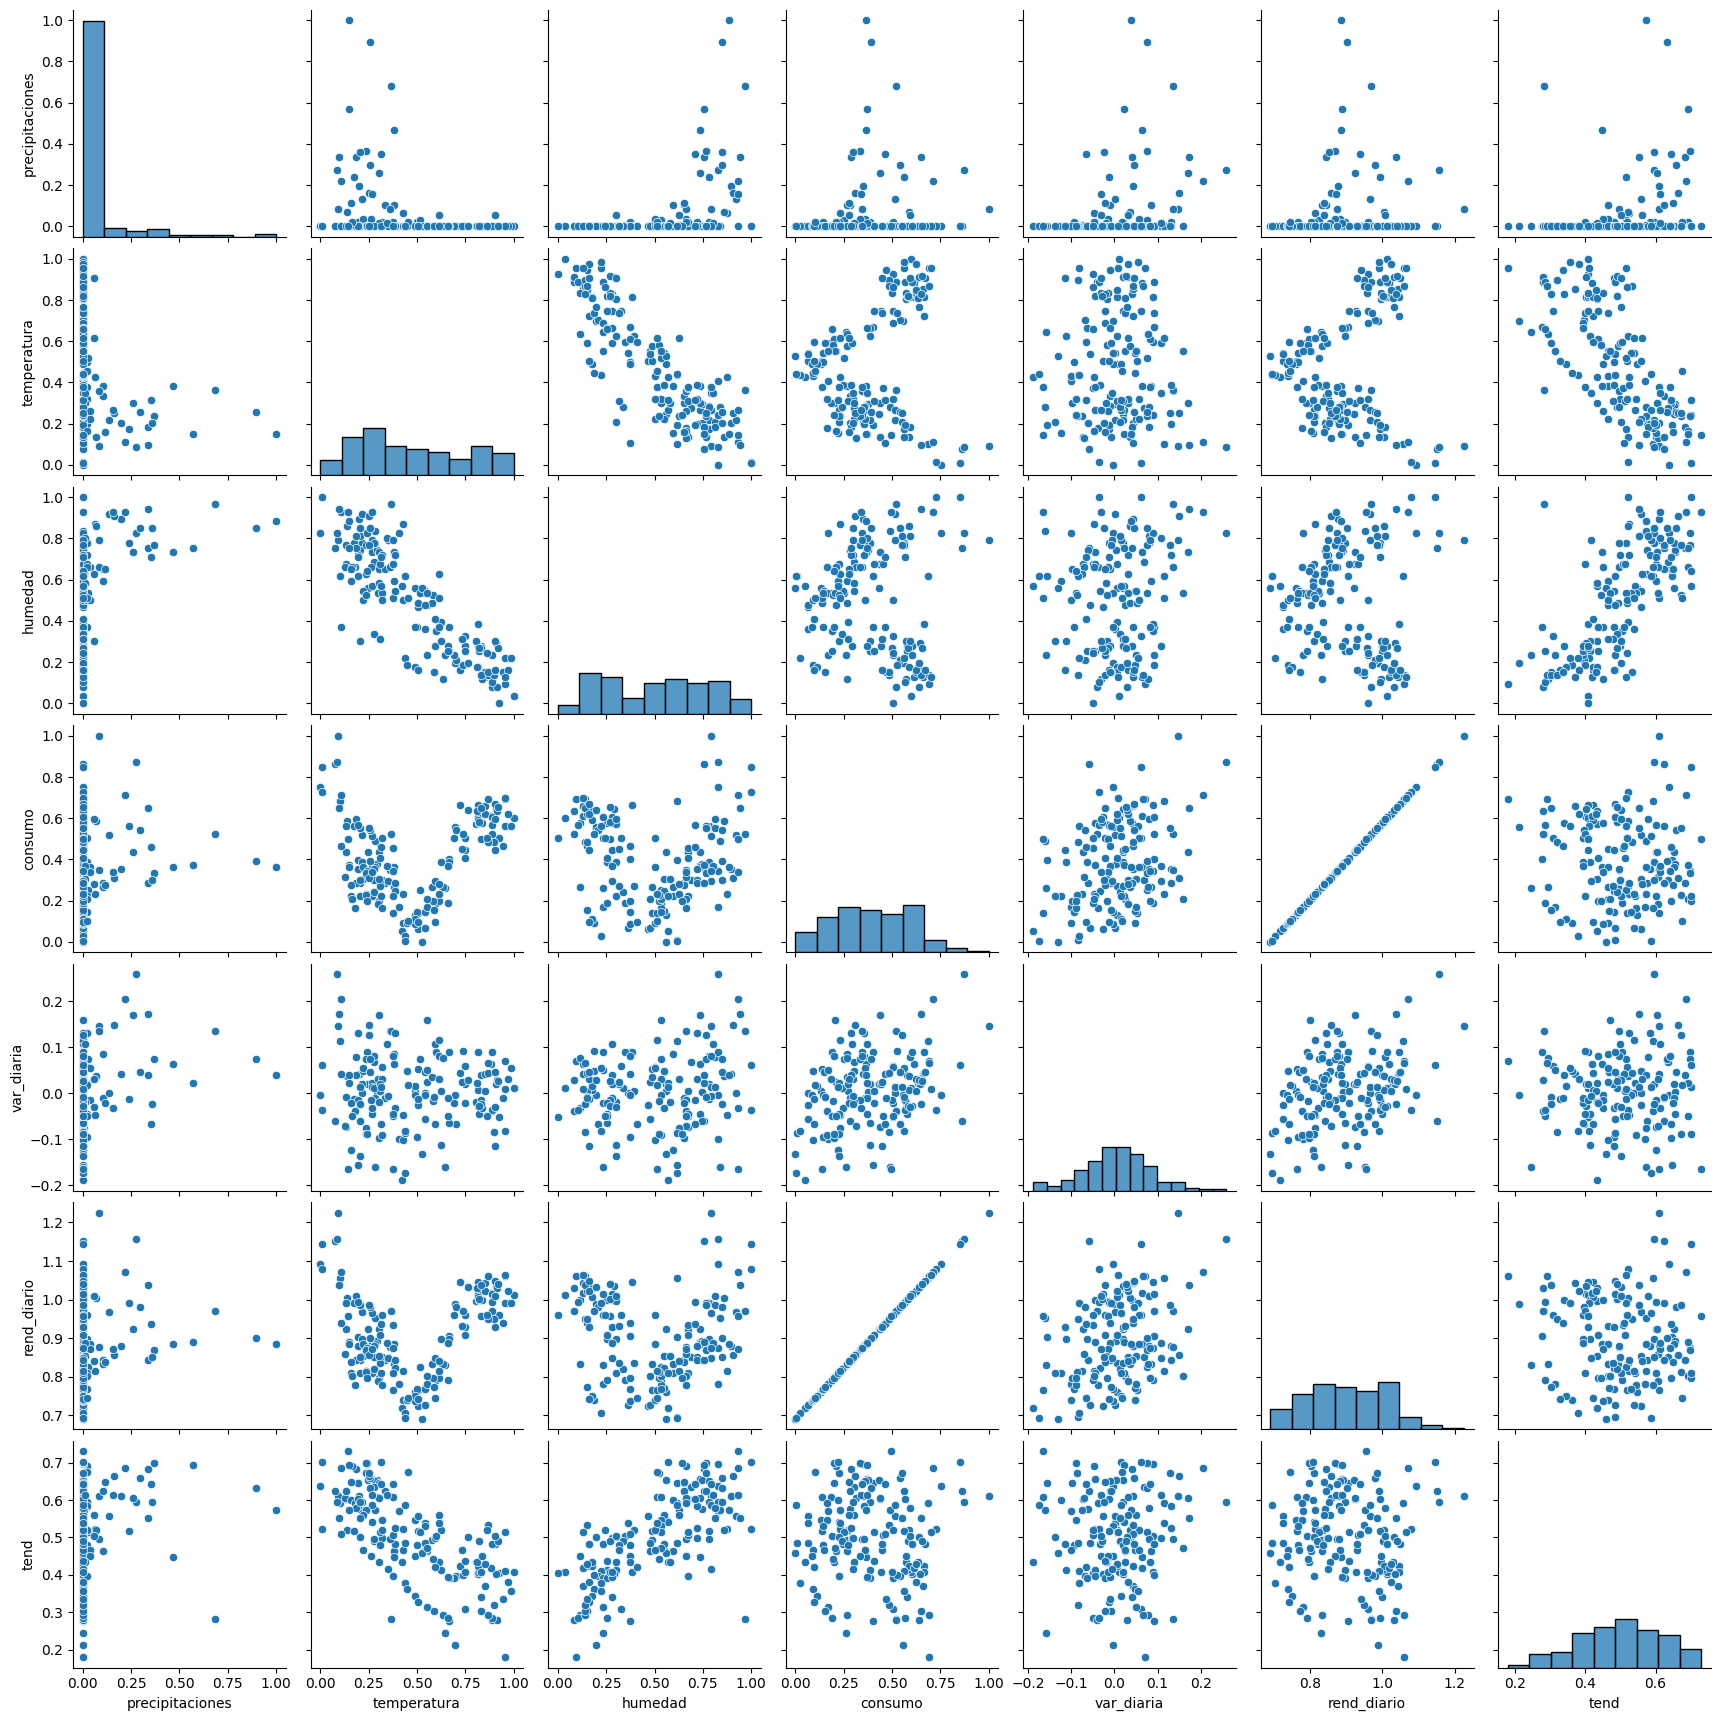

In [117]:
sns.pairplot(datos)

In [ ]:
print(datos.columns)

Index(['fecha', 'precipitaciones', 'temperatura', 'humedad', 'consumo',
       'evento', 'var_diaria', 'rend_diario', 'tend'],
      dtype='object')


In [ ]:
print(datos['fecha'])

30     2020-07-31
45     2020-08-15
46     2020-08-16
47     2020-08-17
48     2020-08-18
          ...    
1583   2024-10-31
1598   2024-11-15
1638   2024-12-25
1644   2024-12-31
1645   2025-01-01
Name: fecha, Length: 168, dtype: datetime64[ns]


Serie en el tiempo combinación de tendencia, seasonality,

<Axes: title={'center': 'tendencia y estacionariedad'}, xlabel='fecha'>

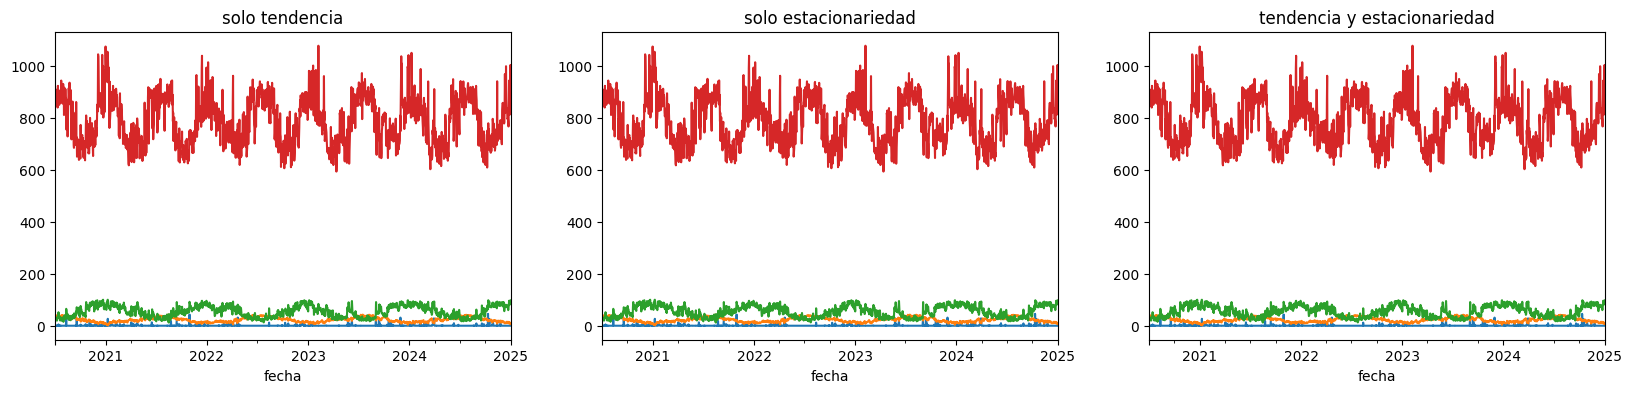

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,4), dpi=100)
pd.read_csv('C:/Users/Patri/Desktop/ejercio disa series temporales/datadef.csv', parse_dates=['fecha'], index_col='fecha').plot(title='solo tendencia', legend=False, ax=axes[0])

pd.read_csv('C:/Users/Patri/Desktop/ejercio disa series temporales/datadef.csv', parse_dates=['fecha'], index_col='fecha').plot(title='solo estacionariedad', legend=False, ax=axes[1])

pd.read_csv('C:/Users/Patri/Desktop/ejercio disa series temporales/datadef.csv', parse_dates=['fecha'], index_col='fecha').plot(title='tendencia y estacionariedad', legend=False, ax=axes[2])

Probar la estacionariedad y la tendencia estacionaria

In [113]:
from statsmodels.tsa.stattools import adfuller, kpss

# Augmented Dickey Fuller (ADF) Test
result = adfuller(datos['consumo'].values, autolag='AIC')
print('ADF Statistic:', result[0], 'p-value:', result[1])

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result = kpss(datos['consumo'].values, nlags="auto", regression='c')
print('KPSS Statistic: ', result[0], 'p-value: ', result[1])

ADF Statistic: -5.9222908647239665 p-value: 2.4900658873291007e-07
KPSS Statistic:  0.12305888342795593 p-value:  0.1


C:\Users\Patri\AppData\Local\Temp\ipykernel_22912\1350322405.py:8: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(datos['consumo'].values, nlags="auto", regression='c')


Interpretación: La hipótesis nula de la prueba ADF es que la serie temporal tiene una raíz unitaria, es decir, que la serie no es estacionaria. Un p-valor muy pequeño (en este caso, 2.49e-07) indica que podemos rechazar la hipótesis nula. Por lo tanto, la serie temporal es estacionaria según la prueba ADF.
El mensaje de advertencia que aparece (InterpolationWarning) indica que el valor de la estadística de la prueba KPSS se encuentra fuera del rango de valores para los cuales existen tablas de p-valores. En este caso, el p-valor calculado es mayor que los valores disponibles en las tablas, pero no afecta significativamente a los resultados, ya que aún se encuentra dentro de un rango razonable de interpretación.

In [115]:
# Augmented Dickey Fuller (ADF) Test
result = adfuller(datos['precipitaciones'].values, autolag='AIC')
print('ADF Statistic:', result[0], 'p-value:', result[1])

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result = kpss(datos['precipitaciones'].values, nlags="auto", regression='c')
print('KPSS Statistic: ', result[0], 'p-value: ', result[1])

ADF Statistic: -4.886722928783113 p-value: 3.701014266254361e-05
KPSS Statistic:  0.4617688156341058 p-value:  0.05053068291633371


In [ ]:
Estadístico ADF: -4.8867

Valor p: 0.000037

La hipótesis nula es que la serie tiene una raíz unitaria (es decir, es no estacionaria).

El valor p es muy bajo (mucho menor que 0.05), por lo tanto se rechaza la hipótesis nula.
La hipótesis nula es que la serie es estacionaria.
kpps 
El valor p está justo alrededor de 0.05, lo que lo convierte en un caso límite. Dependiendo del nivel de significancia que utilices:

Si α = 0.05, es un caso fronterizo — probablemente no se rechaza la hipótesis nula.

Si α = 0.01, no se rechaza claramente la hipótesis nula.

In [117]:
# Augmented Dickey Fuller (ADF) Test
result = adfuller(datos['humedad'].values, autolag='AIC')
print('ADF Statistic:', result[0], 'p-value:', result[1])

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result = kpss(datos['humedad'].values, nlags="auto", regression='c')
print('KPSS Statistic: ', result[0], 'p-value: ', result[1])

ADF Statistic: -3.8713484953683515 p-value: 0.0022561224321649915
KPSS Statistic:  0.073439277398388 p-value:  0.1


C:\Users\Patri\AppData\Local\Temp\ipykernel_22912\2171869103.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(datos['humedad'].values, nlags="auto", regression='c')


In [ ]:
Estadístico ADF: -3.8713

Valor p: 0.00226

📌 Interpretación:

Hipótesis nula: la serie NO es estacionaria (tiene raíz unitaria).

El valor p es bajo (menor que 0.05), por lo tanto, se rechaza la hipótesis nula.

✅ Conclusión: La serie es probablemente estacionaria según la prueba ADF.

In [ ]:
# Augmented Dickey Fuller (ADF) Test
result = adfuller(datos['temperatura'].values, autolag='AIC')
print('ADF Statistic:', result[0], 'p-value:', result[1])

# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test
result = kpss(datos['temperatura'].values, nlags="auto", regression='c')
print('KPSS Statistic: ', result[0], 'p-value: ', result[1])

ADF Statistic: -5.053167322732554 p-value: 1.7399769450092028e-05
KPSS Statistic:  0.03254004231236643 p-value:  0.1


C:\Users\Patri\AppData\Local\Temp\ipykernel_14936\1033373412.py:6: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  result = kpss(datos['temperatura'].values, nlags="auto", regression='c')


In [ ]:
 Interpretación:

Hipótesis nula: la serie no es estacionaria.

El valor p es muy bajo → se rechaza la hipótesis nula.

✅ Conclusión: Según ADF, la serie es estacionaria.

📈 Prueba KPSS
Estadístico KPSS: 0.0325

Valor p: 0.1 (valor p ≥ 0.1)

🔍 Interpretación:

Hipótesis nula: la serie es estacionaria.

El valor p es alto → no se rechaza la hipótesis nula.



Autocorrelación

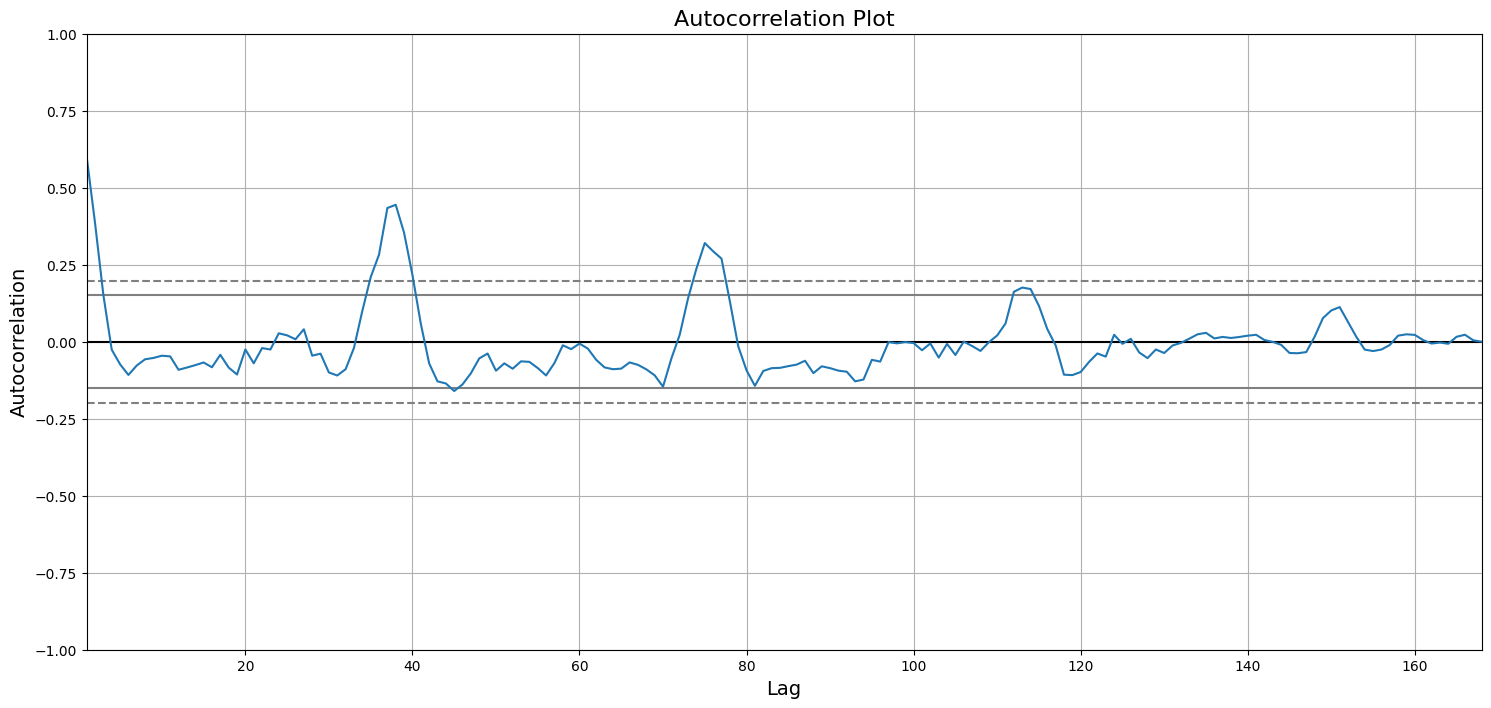

In [118]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(datos['consumo'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()

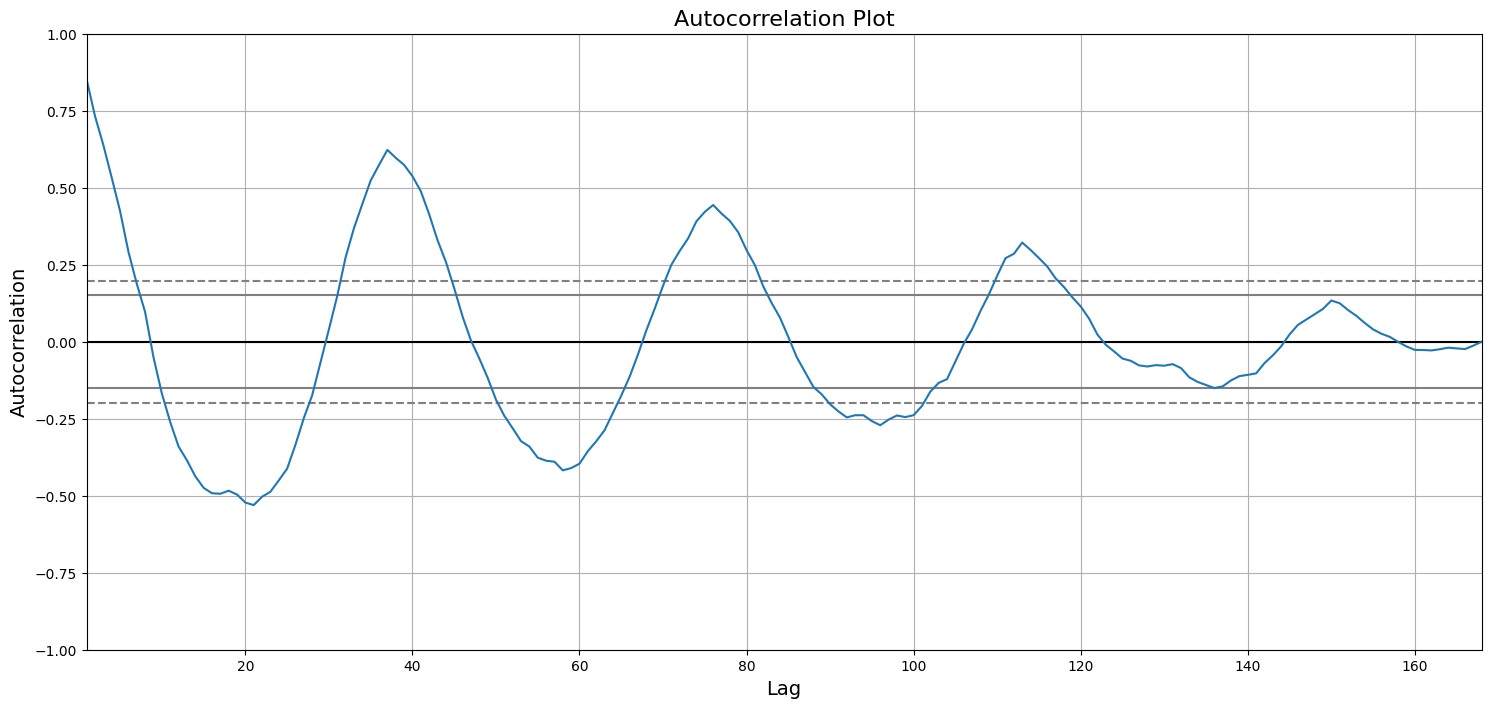

In [119]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(datos['temperatura'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()

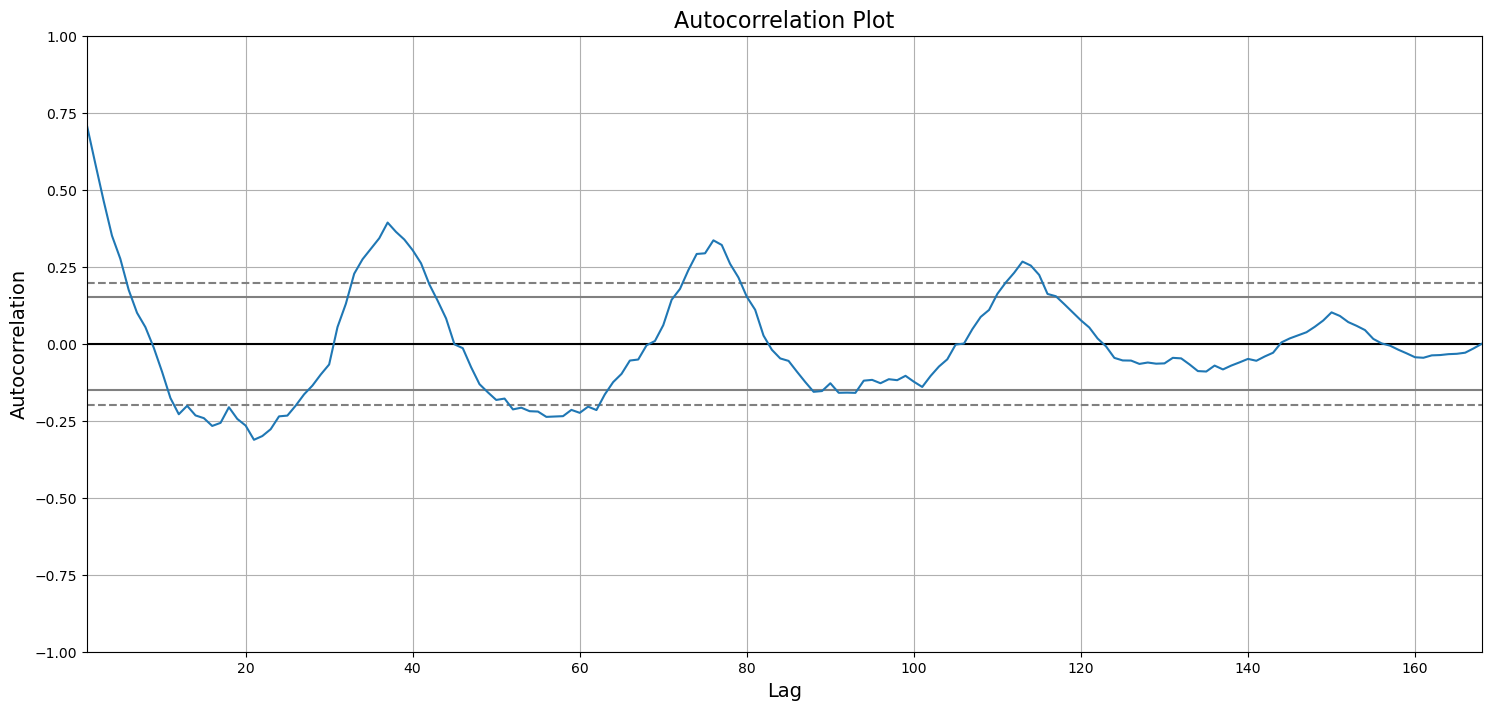

In [119]:

from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(datos['humedad'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()


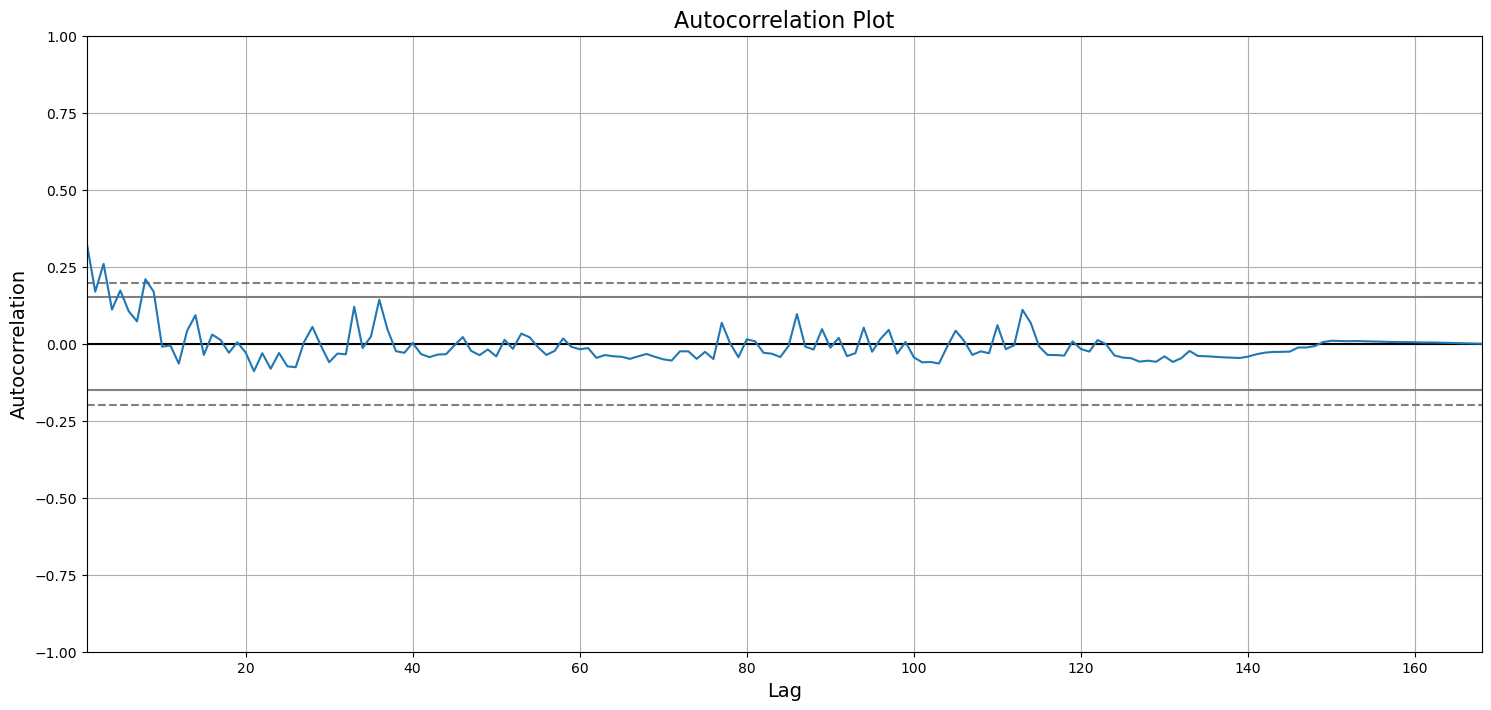

In [121]:
from pandas.plotting import autocorrelation_plot

plt.figure(figsize=(18, 8))
autocorrelation_plot(datos['precipitaciones'])
plt.title('Autocorrelation Plot', fontsize=16)
plt.xlabel("Lag", fontsize=14)
plt.ylabel("Autocorrelation", fontsize=14)
plt.show()

Autocorrelación y autocorrelación parcial

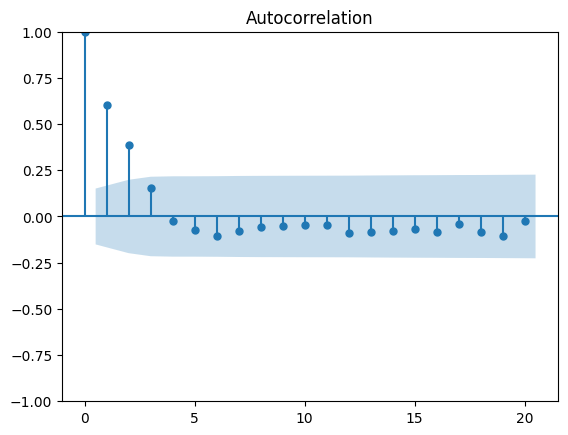

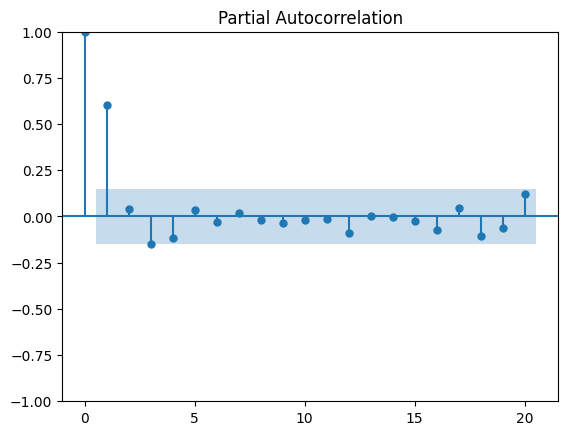

In [657]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(datos['consumo'], lags=20)
plt.show()
plot_pacf(datos['consumo'], lags=20)
plt.show()

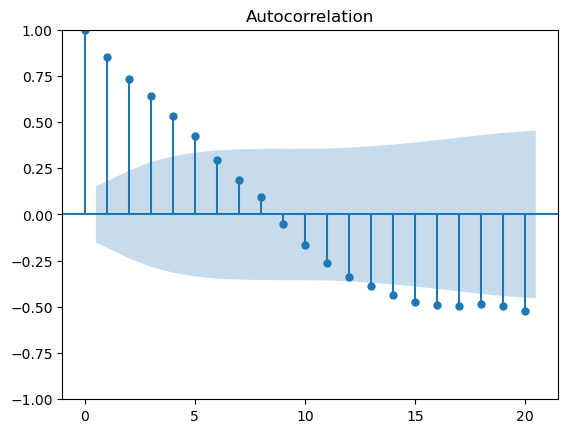

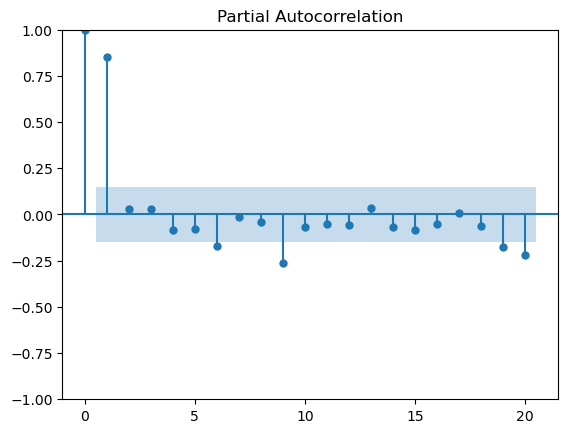

In [123]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(datos['temperatura'], lags=20)
plt.show()
plot_pacf(datos['temperatura'], lags=20)
plt.show()

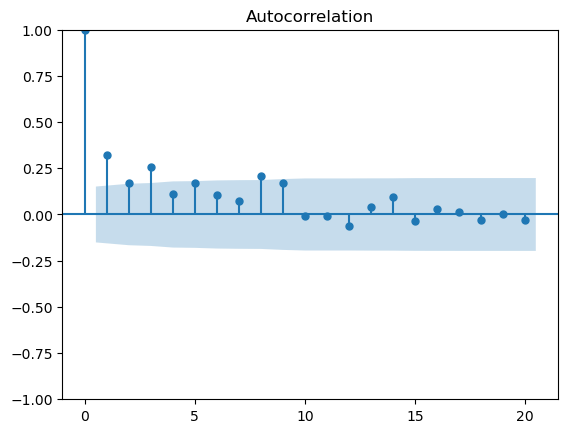

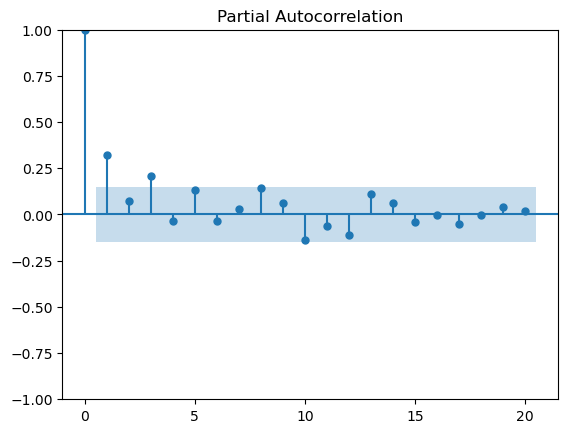

In [125]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(datos['precipitaciones'], lags=20)
plt.show()
plot_pacf(datos['precipitaciones'], lags=20)
plt.show()

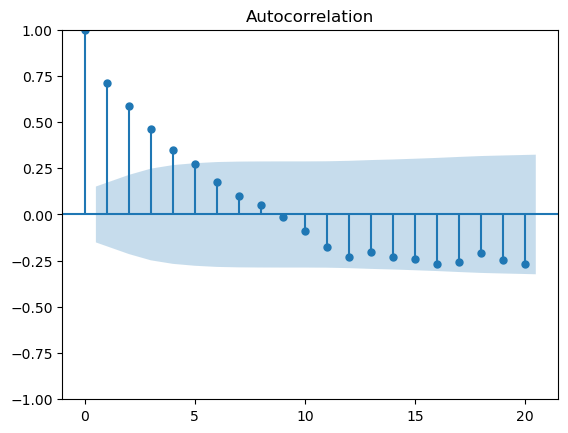

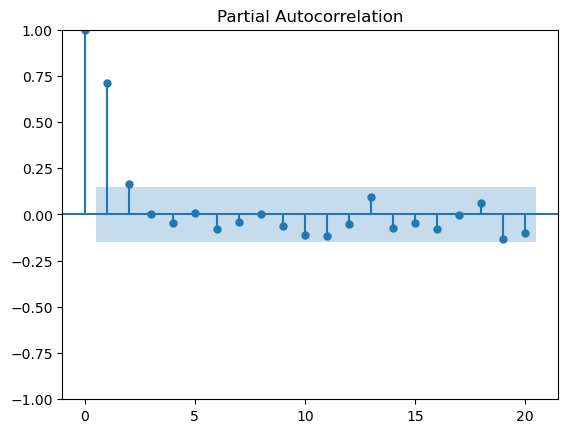

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(datos['humedad'], lags=20)
plt.show()
plot_pacf(datos['humedad'], lags=20)
plt.show()

Sarimax 

In [120]:
import statsmodels.api as sm

order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)

# Selección de variables exógenas
exog = datos[['precipitaciones', 'temperatura', 'humedad']]

# Serie temporal dependiente (asegúrate de que 'y' esté definida correctamente)
model = sm.tsa.SARIMAX(y, exog=exog, order=order, seasonal_order=seasonal_order)
results = model.fit()

# Mostrar resumen del modelo
print(results.summary())

C:\Users\Patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
C:\Users\Patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                            consumo   No. Observations:                  168
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                  49.478
Date:                            Mon, 07 Apr 2025   AIC                            -82.956
Time:                                    21:58:44   BIC                            -58.608
Sample:                                         0   HQIC                           -73.066
                                            - 168                                         
Covariance Type:                              opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
precipitaciones     0.1646      0.134      1.229      0.219      -0.098       0.427
temperatura         

C:\Users\Patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


    Prophet Meta(anterior facebook)

In [138]:

#localpip install fbprophet instalado en mi cmd local

%pip install prophet
from prophet import Prophet



# Prepare your data (ensure the 'ds' and 'y' columns are present)
datos = datos.rename(columns={'fecha': 'ds', 'consumo': 'y'})  # Adjust column names if necessary

# Create a Prophet model
forecaster = Prophet()

# Fit the model to your data
forecaster.fit(datos)

# Create future dataframe
# Make sure you only pass 'periods' as a keyword argument
future = forecaster.make_future_dataframe( periods=10)  # 'periods' specifies how many future periods to forecast

# Make predictions
forecast = forecaster.predict(future)

# Show forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])




ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'C:\\Users\\Patri\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\prophet\\stan_model\\cmdstan-2.33.1\\stan\\lib\\stan_math\\lib\\tbb_2020.3\\include\\tbb\\internal\\_deprecated_header_message_guard.h'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\Patri\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
C:\Users\Patri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Plea

  Using cached prophet-1.1.6-py3-none-win_amd64.whl.metadata (3.6 kB)
  Using cached cmdstanpy-1.2.5-py3-none-any.whl.metadata (4.0 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
  Using cached stanio-0.5.1-py3-none-any.whl.metadata (1.6 kB)
Using cached prophet-1.1.6-py3-none-win_amd64.whl (13.3 MB)
Using cached cmdstanpy-1.2.5-py3-none-any.whl (94 kB)
   ---------------------------------------- 0.0/903.1 kB ? eta -:--:--
   - -------------------------------------- 41.0/903.1 kB 1.9 MB/s eta 0:00:01
   ---------- ----------------------------- 245.8/903.1 kB 3.7 MB/s eta 0:00:01
   ---------------------------------------  901.1/903.1 kB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 903.1/903.1 kB 7.1 MB/s eta 0:00:00
Using cached importlib_resources-6.5.2-py3-none-any.whl (37 kB)
Using cached stanio-0.5.1-py3-none-any.whl (8.1 kB)
Note: you may need to restart the kernel to use updated packages.


22:09:51 - cmdstanpy - INFO - Chain [1] start processing
22:09:52 - cmdstanpy - INFO - Chain [1] done processing


            ds      yhat  yhat_lower  yhat_upper
0   2020-07-31  0.590441    0.452800    0.733059
1   2020-08-15  0.522634    0.384321    0.670961
2   2020-08-16  0.490296    0.355032    0.628143
3   2020-08-17  0.501701    0.365996    0.635180
4   2020-08-18  0.542816    0.392077    0.678053
..         ...       ...         ...         ...
173 2025-01-07  0.709523    0.563595    0.854553
174 2025-01-08  0.694161    0.549643    0.836859
175 2025-01-09  0.692654    0.549837    0.831537
176 2025-01-10  0.672986    0.531390    0.810217
177 2025-01-11  0.643494    0.503503    0.789761

[178 rows x 4 columns]


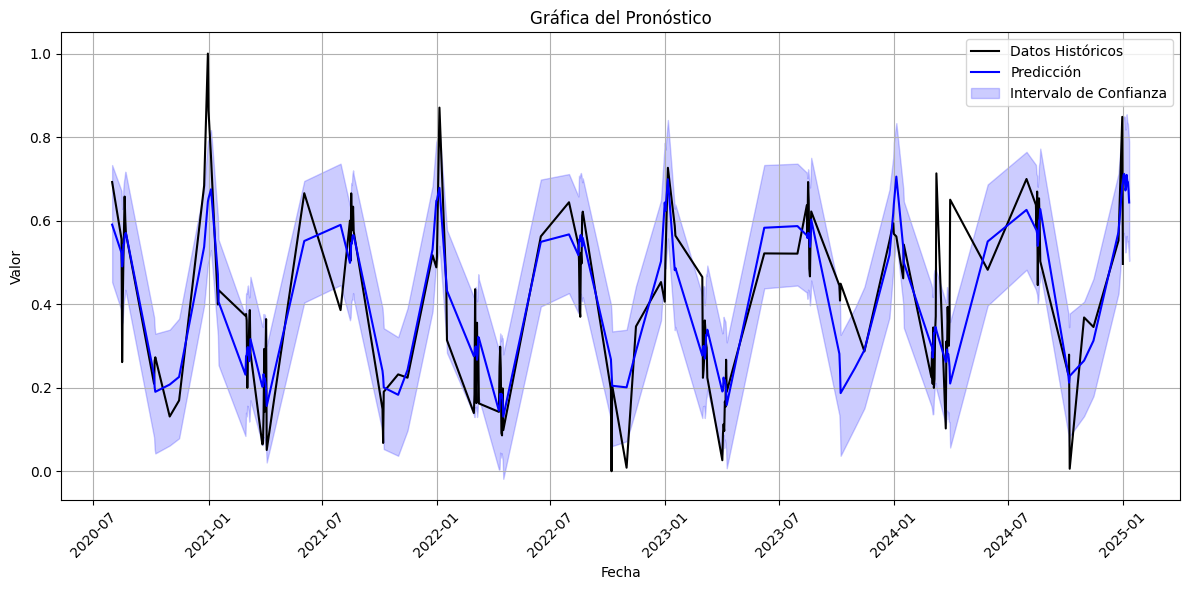

In [139]:

# Supongamos que "forecast" contiene tus datos pronosticados
# y "df" es tu DataFrame original.

plt.figure(figsize=(12, 6))

# Graficar los datos históricos
plt.plot(datos['ds'], datos['y'], label='Datos Históricos', color='black', linewidth=1.5)

# Graficar la predicción central (yhat)
plt.plot(forecast['ds'], forecast['yhat'], label='Predicción', color='blue')

# Intervalos de confianza (yhat_lower, yhat_upper)
plt.fill_between(forecast['ds'], 
                 forecast['yhat_lower'], 
                 forecast['yhat_upper'], 
                 color='blue', alpha=0.2, label='Intervalo de Confianza')

# Etiquetas y diseño
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.title('Gráfica del Pronóstico')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar la gráfica
plt.show()


Media moviles

In [149]:
ma6 = datos['consumo'].rolling(window=6).mean()
ma12 = datos['consumo'].rolling(window=12).mean()

KeyError: 'ma6'

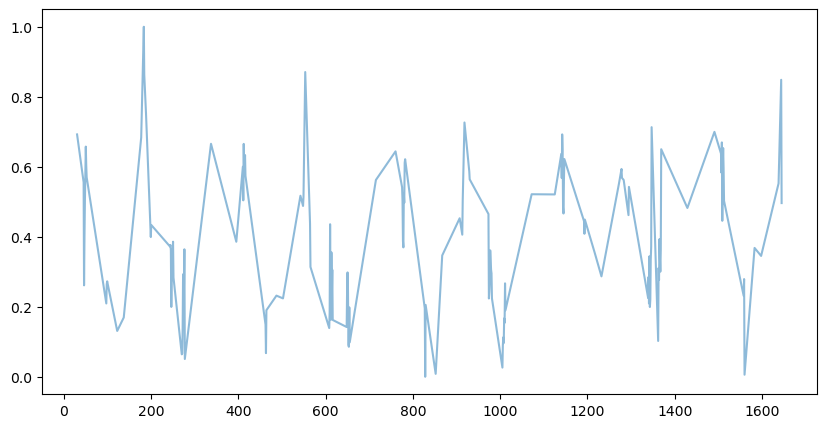

In [151]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(datos['consumo'], label='Original', alpha=0.5)
plt.plot(datos['ma6'], label='Media Móvil 6')
plt.plot(datos['ma12'], label='Media Móvil 12')
plt.legend()
plt.title('Media móvil del consumo')
plt.show()

Como es una muestra grande dividimos 

Dividir Variables en Entrenamiento(80%)y prueba (20%)

In [49]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

Convertir X_train y X_test en array numpy

In [ ]:
# Convertir X_train en un array de NumPy
X_train = np.array(X_train)

print(X_train)

# Convertir y_train en un array de NumPy
X_test = np.array(X_test)

print(X_test)

ModuleNotFoundError: No module named 'sktime.forecasting.autoreg'

Gráfico 

In [ ]:
# ==============================================================================
fig, ax = plt.subplots(figsize=(8, 3.5))
y_train.plot(ax=ax, label='entrenamiento', linewidth=1)
y_test.plot(ax=ax, label='validación', linewidth=1)
y_test.plot(ax=ax, label='test', linewidth=1)
ax.set_title('Demanda eléctrica')
ax.legend();

Redes Neuronales LSM

In [141]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense


Epoch 1/50


C:\Users\Patri\anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.4197
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0178
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0128
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0121
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0122
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0137
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121
Epoch 9/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0116
Epoch 10/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122
Epoch 11/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0123
Epoch 12/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117
Epoch 13/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122
Epoch 14/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125
Epoch 15/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0114
Epoch 16/50
50/50 ━━━━━━━━━━━━

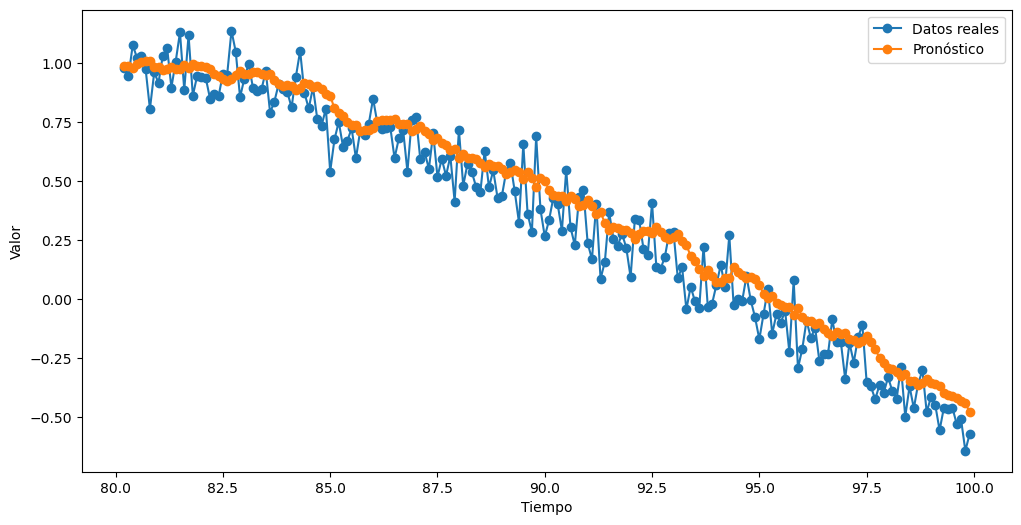

In [155]:
# Crear una serie de tiempo sintética (sinusoidal con ruido)
np.random.seed(0)
t = np.arange(0, 100, 0.1)
sinusoid = np.sin(0.1 * t)
noise = np.random.normal(0, 0.1, len(t))
time_series = sinusoid + noise

# Función para preparar los datos en secuencias de entrada y salida
def prepare_data(time_series, n_steps):
    X, y = [], []
    for i in range(len(time_series) - n_steps):
        X.append(time_series[i:i+n_steps])
        y.append(time_series[i+n_steps])
    return np.array(X), np.array(y)

n_steps = 10  # Número de pasos en la secuencia de entrada
X, y = prepare_data(time_series, n_steps)

# Dividir los datos en conjuntos de entrenamiento y prueba
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape de los datos para que sean compatibles con el modelo LSTM
X_train = X_train.reshape(-1, n_steps, 1)
X_test = X_test.reshape(-1, n_steps, 1)

# Construir un modelo LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(n_steps, 1)),
    Dense(1)
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=50, batch_size=16)

# Evaluar el modelo en el conjunto de prueba
loss = model.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {loss}')

# Realizar pronósticos en el conjunto de prueba
y_pred = model.predict(X_test)

# Graficar los resultados
plt.figure(figsize=(12, 6))
plt.plot(t[train_size+n_steps:], y_test, label='Datos reales', marker='o')
plt.plot(t[train_size+n_steps:], y_pred, label='Pronóstico', marker='o')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.legend()
plt.show()

In [ ]:
Modelo Var

In [157]:
from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse

In [199]:


#Especificar el modelo VAR con un retardo de 2
model = VAR(X,y)

# Resumen de la estimación del modelo
print(results.summary())

# Generar pronósticos para los próximos 5 pasos de tiempo
lag_order = results.k_ar
forecast = results.forecast(datos.values[-lag_order:], steps=5)

# Visualizar los pronósticos
forecast_df = pd.DataFrame(forecast, columns=['consumo', 'evento'])
print(forecast_df)

# Calcular el error RMSE (Root Mean Squared Error) de los pronósticos
actual_data = datos.iloc[-5:]
rmse_score = rmse(actual_data, forecast_df)
print(f'RMSE: {rmse_score:.2f}')

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 08, Apr, 2025
Time:                     20:46:57
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -651.607
Nobs:                     988.000    HQIC:                  -652.282
Log likelihood:           308633.    FPE:               3.44657e-284
AIC:                     -652.697    Det(Omega_mle):    2.76531e-284
--------------------------------------------------------------------
Results for equation y1
            coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------
const          0.000000         0.000000           30.437           0.000
exog0          0.000000         0.000000            0.990           0.322
L1.y1         -0.000000         0.000000           -0.000           1.000
L1.y2          0.

ValueError: Please provide an exog_future argument to the forecast method.